# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | tarakan
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | rock sound
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of 

Processing Record 39 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 4 | apatfalva
Processing Record 41 of Set 4 | chernyshevskiy
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | otradnoye
Processing Record 45 of Set 4 | banda
Processing Record 46 of Set 4 | yashan
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | crnici
Processing Record 0 of Set 5 | arzgir
Processing Record 1 of Set 5 | huarmey
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | yaan
Processing Record 4 of Set 5 | khorostkiv
Processing Record 5 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 5 | kysyl-syr
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | belaya gora
Processing Record 9 of Set 5 | karratha
Processing Record 10 of Set 5 | tual
Processing

Processing Record 33 of Set 8 | muros
Processing Record 34 of Set 8 | bambous virieux
Processing Record 35 of Set 8 | sinnamary
Processing Record 36 of Set 8 | la asuncion
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | xadani
City not found. Skipping...
Processing Record 39 of Set 8 | cayenne
Processing Record 40 of Set 8 | itacoatiara
Processing Record 41 of Set 8 | okmulgee
Processing Record 42 of Set 8 | milkovo
Processing Record 43 of Set 8 | poum
Processing Record 44 of Set 8 | camacha
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | peterborough
Processing Record 47 of Set 8 | aleksandrov gay
Processing Record 48 of Set 8 | aykhal
Processing Record 49 of Set 8 | viedma
Processing Record 0 of Set 9 | changping
Processing Record 1 of Set 9 | ponta delgada
Processing Record 2 of Set 9 | saldanha
Processing Record 3 of Set 9 | gao
Processing Record 4 of Set 9 | khani
Processing Record 5 of Set 9 | zemio
Processing Record 6 of Set 9 

Processing Record 24 of Set 12 | minas
Processing Record 25 of Set 12 | sorland
Processing Record 26 of Set 12 | altamira
Processing Record 27 of Set 12 | lompoc
Processing Record 28 of Set 12 | kindu
Processing Record 29 of Set 12 | rabo de peixe
Processing Record 30 of Set 12 | alice springs
Processing Record 31 of Set 12 | aquidauana
Processing Record 32 of Set 12 | zaragoza
Processing Record 33 of Set 12 | zurrieq
Processing Record 34 of Set 12 | gushikawa
Processing Record 35 of Set 12 | tessalit
Processing Record 36 of Set 12 | port hedland
Processing Record 37 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 12 | rapid valley
Processing Record 39 of Set 12 | guane
Processing Record 40 of Set 12 | vestmannaeyjar
Processing Record 41 of Set 12 | zhob
Processing Record 42 of Set 12 | mafeteng
Processing Record 43 of Set 12 | isangel
Processing Record 44 of Set 12 | matadi
Processing Record 45 of Set 12 | arica
Processing Record 46 of Set 12 | paulinia
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,297.17,81,100,6.17,PF,1670297191
1,saskylakh,71.9167,114.0833,249.67,97,100,8.05,RU,1670297192
2,punta arenas,-53.1500,-70.9167,278.21,70,40,4.63,CL,1670297192
3,barrow,71.2906,-156.7887,269.16,80,100,6.17,US,1670296964
4,yellowknife,62.4560,-114.3525,237.90,68,0,3.60,CA,1670297193


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_files/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data_files/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,297.17,81,100,6.17,PF,1670297191
1,saskylakh,71.9167,114.0833,249.67,97,100,8.05,RU,1670297192
2,punta arenas,-53.1500,-70.9167,278.21,70,40,4.63,CL,1670297192
3,barrow,71.2906,-156.7887,269.16,80,100,6.17,US,1670296964
4,yellowknife,62.4560,-114.3525,237.90,68,0,3.60,CA,1670297193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

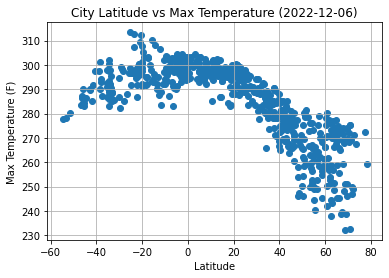

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature ({runDate})")
plt.grid()

# Save the figure
plt.savefig("output_data_files/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

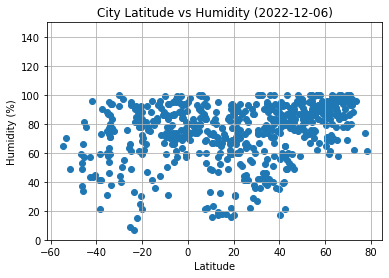

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values =city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({runDate})')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data_files/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

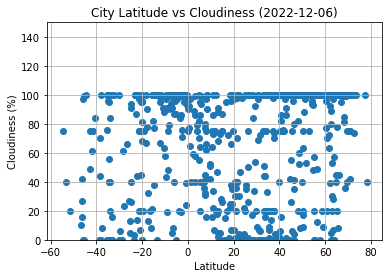

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values =city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({runDate})')
plt.ylim(0, 150)
plt.grid()
# Save the figure
plt.savefig("output_data_files/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

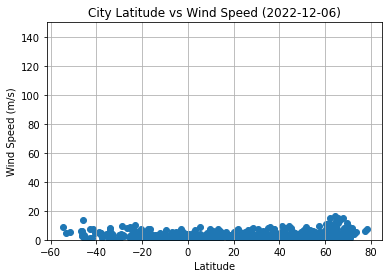

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values =city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs Wind Speed ({runDate})')
plt.ylim(0, 150)
plt.grid()
# Save the figure
plt.savefig("output_data_files/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is: {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saskylakh,71.9167,114.0833,249.67,97,100,8.05,RU,1670297192
3,barrow,71.2906,-156.7887,269.16,80,100,6.17,US,1670296964
4,yellowknife,62.4560,-114.3525,237.90,68,0,3.60,CA,1670297193
6,severo-kurilsk,50.6789,156.1250,269.64,76,88,7.04,RU,1670297193
11,tarakan,3.3000,117.6333,300.44,75,58,0.97,ID,1670297195


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,297.17,81,100,6.17,PF,1670297191
2,punta arenas,-53.1500,-70.9167,278.21,70,40,4.63,CL,1670297192
5,ushuaia,-54.8000,-68.3000,277.96,65,75,8.75,AR,1670296906
7,mataura,-46.1927,168.8643,283.42,37,16,2.75,NZ,1670297194
8,port alfred,-33.5906,26.8910,286.58,94,100,0.89,ZA,1670297194


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8500679891261148
y = -0.69x + 305.61


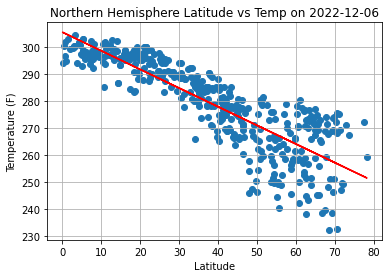

In [15]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Northern Hemisphere Latitude vs Temp on {runDate}.png")

plt.show()


The r-value is: 0.5104281094253249
y = 0.25x + 300.35


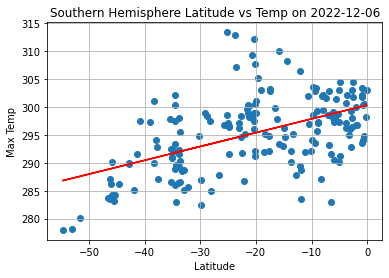

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Southern Hemisphere Latitude vs Temp on {runDate}.png")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34031801900195563
y = 0.33x + 63.04


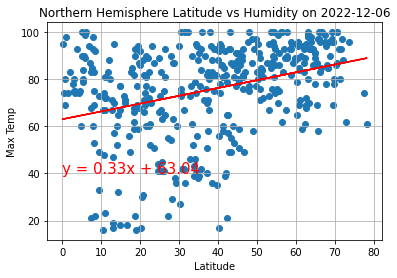

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Nothern Hemisphere Latitude vs Humidity on {runDate}.png")

The r-value is: 0.3144107167126756
y = 0.45x + 80.6


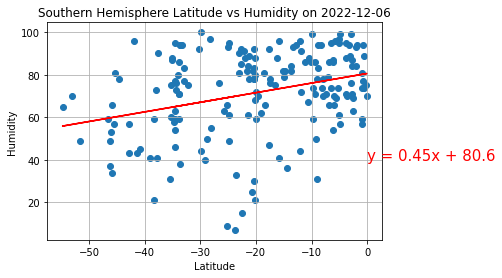

In [18]:
# Southern Hemisphere
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Southern Hemisphere Latitude vs Humidity on {runDate}.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.251369066429116
y = 0.49x + 40.49


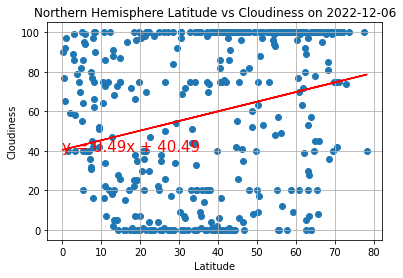

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png")

The r-value is: 0.3988631718334375
y = 1.1x + 84.38


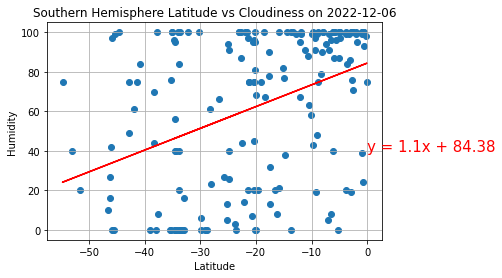

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.29024341484399363
y = 0.04x + 1.93


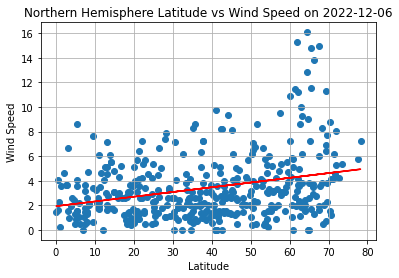

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png")

The r-value is: -0.3814236790065717
y = -0.06x + 1.92


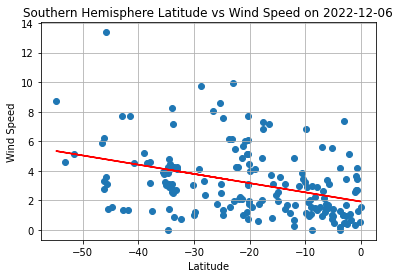

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data_files folder
plt.savefig("output_data_files/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE